## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. Regression uses the average nearest neighbor to the new x to oredict a numeric value for y. Classification uses the frequency of neighbors to predict the probability of the unknowns class.

2. A confusion table is a table which cross tabulates predictions and true values. It helps to understand how close our predictions were to true classifications and where the model made mistakes (false positive/false negative).

3. The SSE measures how far away the predicted values were from the real values.

4. Overfitting is focusing on specific features in the data that are unlikely to be useful for prediction in the population as a whole. Underfitting occurs when too little data features are used when creating the model so predictions fail to incorporate all useful metrics.

5. By choosing k based on minimum SSE, model performance increases because that is the k in which the distance between true values and predicted values is the smallest. Other ways of choosing k lead to higher SSE values and thus greater distances between real and predicted values.

6. Reporting a class label gives a direct answer that some may be looking for when running a predictive model. However, in situations where the most likely label is only slightly more likely than another classes then this kind of prediction is likely to make mistakes. Instead, reporting the probability of classes gives a more accurate description of what class a new observation may belong too. Some may not appreciate the uncertainity in this answer and question the strength of the model if it cannot predict classes with true confidence.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix

mines = pd.read_csv('/content/land_mines.csv')
mines



,voltage,height,soil,mine_type
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1
...,...,...,...,...
333,0.323262,0.909091,0.4,5
334,0.444108,0.181818,1.0,5
335,0.353474,0.454545,1.0,5
336,0.362537,0.727273,1.0,5


In [3]:
mines.describe()

,voltage,height,soil,mine_type
count,338.000000,338.000000,338.000000,338.000000
mean,0.430634,0.508876,0.503550,2.952663
std,0.195819,0.306043,0.344244,1.419703
min,0.197734,0.000000,0.000000,1.000000
25%,0.309737,0.272727,0.200000,2.000000
50%,0.359516,0.545455,0.600000,3.000000
75%,0.482628,0.727273,0.800000,4.000000
max,0.999999,1.000000,1.000000,5.000000


,count
mine_type,
1,71
2,70
3,66
4,66
5,65


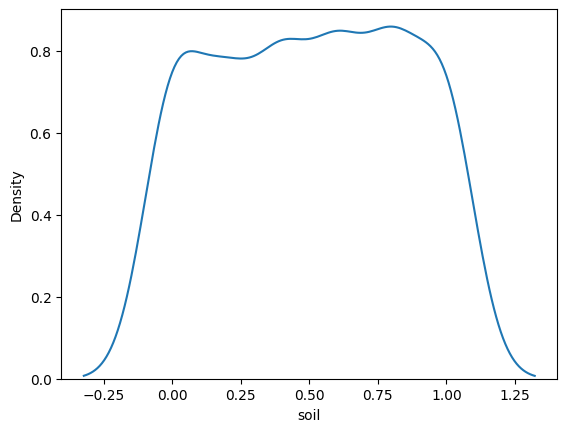

In [10]:
mine_types = mines['mine_type'].value_counts()
# hist = sns.histplot(data=mines, x='mine_type')
# voltage = sns.kdeplot(data=mines, x='voltage')
# height = sns.kdeplot(data=mines, x='height')
soil = sns.kdeplot(data=mines, x='soil')
mine_types


<Axes: xlabel='voltage', ylabel='height'>

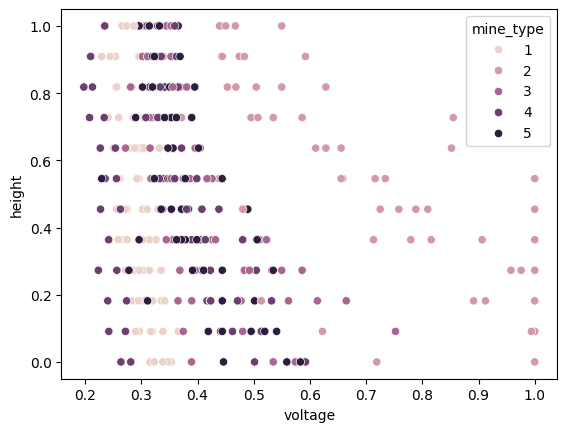

In [11]:
sns.scatterplot(data=mines, x='voltage', y='height', hue='mine_type')


In [27]:
y = mines['mine_type']
X = mines.loc[:,['soil','voltage','height']]


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.5, random_state=200 )

training_amount = len(y_train)
testing_amount = len(y_test)

k_bar = training_amount
accuracy = np.zeros(k_bar)
for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1)
    fitted_model = model.fit(X_train.values,y_train)
    y_hat = fitted_model.predict(X_test.values)
    accuracy[k] = np.sum( y_hat == y_test )/testing_amount
best_accuracy = np.max(accuracy)
max_index = np.where(accuracy==best_accuracy)
k_star = max_index[0]+1
print('Best accuracy: ', best_accuracy)
print('Best number of neighbors: ', k_star)

Best accuracy:  0.41420118343195267
Best number of neighbors:  [2]


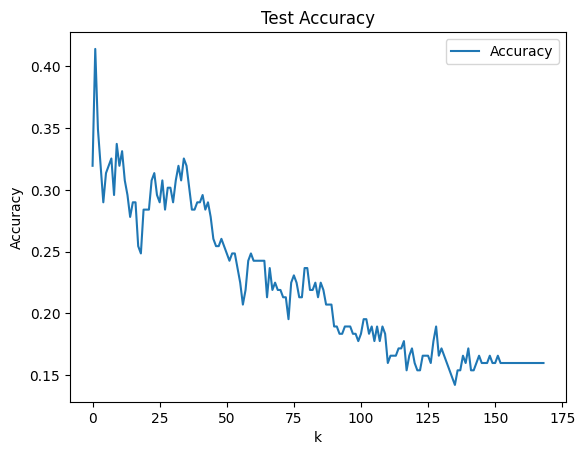

In [31]:
plt.plot(np.arange(0,k_bar),accuracy,label='Accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title('Test Accuracy')
plt.show()

It appears that I am missing something when I check my results with the solutions. Ah, I did not have the random_state part so the result was changing each time.

Maximum accuracy:  0.41420118343195267
Optimal k:  [2]


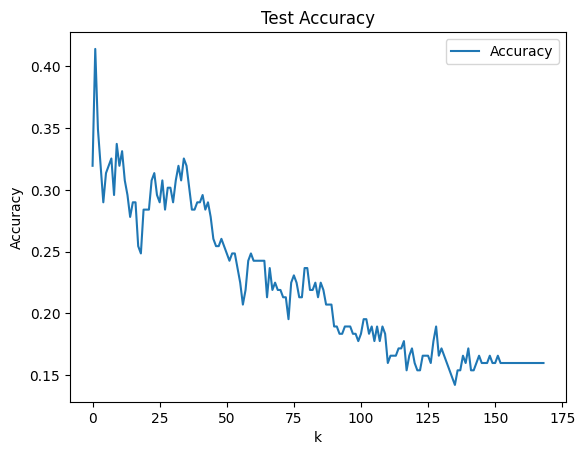

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.5, # Split the sample 80 train/ 20 test
                                                    random_state=200) # For replication purposes

# 3. Build a $k$-NN classifier. Explain how you select $k$.
N_train = len(y_train)
N_test = len(y_test)

## Solve for k that maximizes accuracy:
k_bar = N_train # Number of k's to try
Acc = np.zeros(k_bar) # We'll store the accuracy here

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test.values) # Predict values for test set
    Acc[k] = np.sum( y_hat == y_test )/N_test # Accuracy on testing data
Acc_max = np.max(Acc) # Find highest recorded Accuracy
max_index = np.where(Acc==Acc_max) # Find the indices that equal the maximum
k_star = max_index[0]+1 # Find the optimal value of k; why index+1?
print('Maximum accuracy: ', Acc_max)
print('Optimal k: ', k_star)


## Accuracy plot:
plt.plot(np.arange(0,k_bar),Acc,label='Accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title('Test Accuracy')
plt.show()

In [28]:
#I chose 2 neighbors as k=2 displayed the greatest accuracy ^

model = KNeighborsClassifier(n_neighbors=2)
fitted_model = model.fit(X_train.values,y_train)
y_hat = fitted_model.predict(X_test.values)
confusion_matrix(y_test,y_hat)

array([[23,  0,  9,  4,  1],
       [ 1, 32,  4,  3,  0],
       [12,  1, 10,  3,  1],
       [14,  5,  9,  4,  3],
       [11,  1, 15,  2,  1]])

In [29]:
print(pd.crosstab(y_hat, y_test))

mine_type   1   2   3   4   5
row_0                        
1          23   1  12  14  11
2           0  32   1   5   1
3           9   4  10   9  15
4           4   3   3   4   2
5           1   0   1   3   1


The accuracy is 40%, which means I would 100% not be going near those mines.
When 1 is predicted, it is mostly 1 but also 3,4,5.
The model predicts 2 fairly well but picks 1,3,4 occasionally
The model does not know how to predict 3, 4, or 5

You may be able to us this model when type 1 or 2 is predicted and you are using a robot or defusing doesnt risk life and limb.